# Operation of JAIF

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import requests as wr
from scipy.optimize import minimize
from pandas.tseries.offsets import BDay
import datetime as dt
import csv
import warnings
from pandas.stats.api import ols
import json
from StringIO import StringIO

warnings.filterwarnings('ignore')
%matplotlib inline
#%cd 'jaif'

from statistics import *
from helpers import *
from constants import *
from rebalance_funcs import *
from pc import *
from rebalance_helpers import *

## On-the-fly

Create entire portfolio series and statistics

In [2]:
import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)

In [55]:
l = ["0P0000704P", "0P000070TG"]
p = pd.DataFrame()
for fund_id in l:
    request = request_mstar_info(fund_id)
    prices = get_mstar_price_series(request)
    df_prices = pd.DataFrame(prices, columns = ["price"])
    df_prices['fund_id'] = fund_id
    p = pd.concat([p, df_prices])

DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): globalquote.morningstar.com
DEBUG:requests.packages.urllib3.connectionpool:http://globalquote.morningstar.com:80 "GET /globalcomponent/RealtimeHistoricalStockData.ashx?ticker=0P0000704P&showVol=false&dtype=his&f=d&curry=CAD&range=1900-1-1%7C2017-04-21&isD=true&isS=true&hasF=true&ProdCode=DIRECT HTTP/1.1" 200 None
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): globalquote.morningstar.com
DEBUG:requests.packages.urllib3.connectionpool:http://globalquote.morningstar.com:80 "GET /globalcomponent/RealtimeHistoricalStockData.ashx?ticker=0P000070TG&showVol=false&dtype=his&f=d&curry=CAD&range=1900-1-1%7C2017-04-21&isD=true&isS=true&hasF=true&ProdCode=DIRECT HTTP/1.1" 200 None


In [56]:
pp = p.pivot(columns="fund_id", values="price").dropna()
pp = pp.resample('W').first()
pp = pp/pp.shift(1)-1.


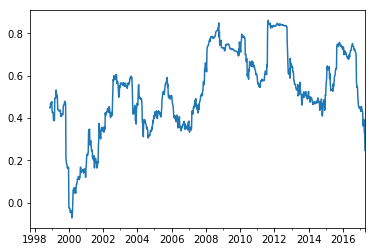

In [57]:
pp.rolling(window=60).corr().iloc[:,0,1].plot()

In [91]:
pull()
calculateBenchmarkPrices()
calculatePortfolios()
calculateOccasionals()

INFO:pc:retrieving list of funds
INFO:pc:F0CAN05MYF: TD Canadian Bond Index Fund
DEBUG:requests.packages.urllib3.connectionpool:Starting new HTTP connection (1): globalquote.morningstar.com
DEBUG:requests.packages.urllib3.connectionpool:http://globalquote.morningstar.com:80 "GET /globalcomponent/RealtimeHistoricalStockData.ashx?ticker=F0CAN05MYF&showVol=false&dtype=his&f=d&curry=CAD&range=1900-1-1%7C2017-04-22&isD=true&isS=true&hasF=true&ProdCode=DIRECT HTTP/1.1" 200 None
DEBUG:pc:Retrieved Dividends Preview:             dividend     fund_id
2016-11-30    0.0243  F0CAN05MYF
2016-12-16    0.0168  F0CAN05MYF
2017-01-31    0.0330  F0CAN05MYF
2017-02-28    0.0224  F0CAN05MYF
2017-03-31    0.0264  F0CAN05MYF
DEBUG:pc:Retrieved Prices Preview:             price     fund_id
2017-04-17  11.71  F0CAN05MYF
2017-04-18  11.76  F0CAN05MYF
2017-04-19  11.74  F0CAN05MYF
2017-04-20  11.73  F0CAN05MYF
2017-04-21  11.75  F0CAN05MYF
INFO:pc:F0CAN05NJO: TD Canadian Index Fund
DEBUG:requests.packages.urlli

True

In [7]:
calculatePortfolios()
calculateOccasionals()

INFO:pc:Calculating Portfolios 
INFO:pc:Calculating on cibc portfolios...
DEBUG:pc:Calculating Prices/Stats for rp
DEBUG:rebalance_funcs:Rebalancing: 03/07/2001 Capital - 1.00
DEBUG:rebalance_funcs:Rebalancing: 28/09/2001 Capital - 0.99
DEBUG:rebalance_funcs:Rebalancing: 31/12/2001 Capital - 1.03
DEBUG:rebalance_funcs:Rebalancing: 29/03/2002 Capital - 1.09
DEBUG:rebalance_funcs:Rebalancing: 28/06/2002 Capital - 1.08
DEBUG:rebalance_funcs:Rebalancing: 30/09/2002 Capital - 1.06
DEBUG:rebalance_funcs:Rebalancing: 31/12/2002 Capital - 1.10
DEBUG:rebalance_funcs:Rebalancing: 31/03/2003 Capital - 1.05
DEBUG:rebalance_funcs:Rebalancing: 30/06/2003 Capital - 1.08
DEBUG:rebalance_funcs:Rebalancing: 30/09/2003 Capital - 1.15
DEBUG:rebalance_funcs:Rebalancing: 31/12/2003 Capital - 1.24
DEBUG:rebalance_funcs:Rebalancing: 31/03/2004 Capital - 1.29
DEBUG:rebalance_funcs:Rebalancing: 30/06/2004 Capital - 1.26
DEBUG:rebalance_funcs:Rebalancing: 30/09/2004 Capital - 1.26
DEBUG:rebalance_funcs:Rebalanci

True

In [8]:
calculateBenchmarkPrices()

INFO:pc:Calculating Benchmark Prices
INFO:pc:Calculating price on cibc benchmark...
DEBUG:rebalance_funcs:Rebalancing: 01/02/2002 Capital - 1.00
DEBUG:pc:Calculated Benchmark Prices Preview: fund_id     F0CAN05OEZ
Date                  
2017-04-17    1.558096
2017-04-18    1.560867
2017-04-19    1.563448
2017-04-20    1.569653
2017-04-21    1.570896
INFO:pc:Saving benchmark prices
INFO:pc:Calculating price on td benchmark...
DEBUG:rebalance_funcs:Rebalancing: 04/09/1987 Capital - 1.00
DEBUG:pc:Calculated Benchmark Prices Preview: fund_id     0P000070LK
Date                  
2017-04-17    4.927831
2017-04-18    4.927831
2017-04-19    4.926009
2017-04-20    4.944226
2017-04-21    4.944226
INFO:pc:Saving benchmark prices
INFO:pc:Calculating price on scotia benchmark...
DEBUG:rebalance_funcs:Rebalancing: 09/12/2002 Capital - 1.00
DEBUG:pc:Calculated Benchmark Prices Preview: fund_id     F0CAN05NSU
Date                  
2017-04-17    2.123718
2017-04-18    2.128111
2017-04-19    2.132070


True

In [ ]:
# yahoo price
def pull(clean=False):
    # Get Existing Funds Information
    funds = pd.read_csv(APP_STATIC+'/ducket/funds.csv').set_index('value')
    
    now = dt.datetime.now()
    
    timeframe = now.year-1
    if(clean):
        timeframe = 1950
    
        
    # Download Data from Yahoo
    p = pd.DataFrame()
    for i in funds.index:
        print funds.loc[i]['label']
        r = wr.get('http://chart.finance.yahoo.com/table.csv?s='+i+'&a=0&b=1&c='+str(timeframe)+
                   '&d='+str(now.month-1)+'&e='+str(now.day)+'&f='+str(now.year)+'&g=d&ignore=.csv', verify=False)
        res = pd.DataFrame(list(csv.reader(r.content.splitlines(), delimiter=',')))
        res = res.rename(columns = res.iloc[0]).iloc[1:] #set the header row as the df header
        res = res[['Date','Close']] #get just close
        res['value'] = i
        p = pd.concat([p, res], ignore_index=False)
    
    return p.reset_index(drop=True)


# td

def pull(clean=False):
    # Get Existing Funds Information
    funds = pd.read_csv(APP_STATIC+'/ducket/funds.csv').set_index('value')
    
    timeframe = 1
    if(clean):
        timeframe = 7
        
    # Download Data
    def parseDownload(r,i):
        res = list(csv.reader(r.content.splitlines(), delimiter=','))
        res.pop(0) # get rid of header
        res = pd.DataFrame(res)
        res = res.rename(columns = res.iloc[0]) #set the header row as the df header
        res = res.iloc[1:, 0:3]
        res['Yield'] = (res['Yield'].replace( '[\$,)]','', regex=True )
                       .replace( '[(]','-', regex=True ).astype(float))
        res['Date'] = res['Date'].apply(pd.to_datetime)
        res['Distribution'] = res['Distribution'].astype(float)
        res['fundID'] = i
        return res

    p = pd.DataFrame()
    for i in funds.index:
        print funds.loc[i]['label']
        r = wr.post('https://graphtdam.tdbank.ca/getFileDownload.form', verify=False,
                data = {'fundOne': i, 'appName': 'TDAM', 'timeFrame': timeframe, 'chooseActionForm': 2})
        res = parseDownload(r, i)
        p = pd.concat([p, res])

    # Parse and update existing files
    p['adjYield'] = p['Distribution'] + p['Yield']
    piv_p = p.pivot(index='Date', columns='fundID', values='adjYield')
    distro = p[p['Distribution'] > 0.][['Date', 'Distribution', 'fundID']].set_index('Date')

    return [piv_p, distro]